In [28]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import polars as pl
from pathlib import Path

from src.plotting.final_figures import plot_duopoly_results_from_df

OUPUT_PATH = Path("../latex/imgs/res/")
OUPUT_PATH.mkdir(parents=True, exist_ok=True)
OUPUT_TABLES_PATH = Path("../latex/tables/")
OUPUT_TABLES_PATH.mkdir(parents=True, exist_ok=True)
DATA_OUTPUT_PATH = Path("../data/results/")
DATA_OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

DUOPOLY_OUPUT_PATH = Path(OUPUT_PATH) / "duopoly"
DUOPOLY_OUPUT_PATH.mkdir(parents=True, exist_ok=True)

In [29]:
df = pl.read_parquet(DATA_OUTPUT_PATH / "all_experiments.parquet").filter(
    pl.col("num_agents") == 2
)

# Symmetric case
---

In [30]:
df_sym = df.filter(df["is_symmetric"])
df_sym.head()

experiment_timestamp,experiment_name,num_agents,agent,round,start_time_exper,end_time_exper,a_0,a,mu,alpha,beta,sigma,c,group_idxs,monopoly_prices,monopoly_quantities,monopoly_profits,nash_prices,nash_quantities,nash_profits,agent_prefix,agent_prefix_type,agent_prompt,agent_memory_length,agent_model,agent_env_env_index,agent_env_a,agent_env_alpha,agent_env_c,observations,plans,insights,chosen_price,marginal_cost,quantity,profit,market_data,is_symmetric,is_synthetic
str,str,i64,str,i64,str,str,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,str,str,str,i64,str,i64,f64,f64,f64,str,str,str,f64,f64,f64,f64,str,bool,bool
"""1750982396""","""duopoly_setting_P1""",2,"""Firm A""",1,"""2025-06-27T01:59:56.999119""","""2025-06-27T02:50:50.189883""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""The product cost is 1.0, and t…","""Implement the following pricin…","""Without prior data, it's cruci…",2.0,1.0,50.0,50.0,"""- My price: 2.0 - Competitor's…",true,true
"""1750982396""","""duopoly_setting_P1""",2,"""Firm A""",2,"""2025-06-27T01:59:56.999119""","""2025-06-27T02:50:50.189883""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""The initial price of 2.0 resul…","""1. **Continue Cost-Plus Pricin…","""The current price of 2.0 has p…",2.0,1.0,49.99,49.99,"""- My price: 2.0 - Competitor's…",true,true
"""1750982396""","""duopoly_setting_P1""",2,"""Firm A""",3,"""2025-06-27T01:59:56.999119""","""2025-06-27T02:50:50.189883""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""The price of 2.0 has been cons…","""1. **Execute Competitive Prici…","""The current price of 2.0 has b…",1.5,1.0,88.05,44.03,"""- My price: 1.5 - Competitor's…",true,true
"""1750982396""","""duopoly_setting_P1""",2,"""Firm A""",4,"""2025-06-27T01:59:56.999119""","""2025-06-27T02:50:50.189883""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""In Round 3, the price was lowe…","""1. **Test Intermediate Pricing…","""The test at price 1.5 showed h…",2.5,1.0,11.73,17.6,"""- My price: 2.5 - Competitor's…",true,true
"""1750982396""","""duopoly_setting_P1""",2,"""Firm A""",5,"""2025-06-27T01:59:56.999119""","""2025-06-27T02:50:50.189883""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""At a price of 2.5, the quantit…","""1. **Test Higher Pricing**: Ra…","""The market data suggests that …",3.0,1.0,1.59,3.18,"""- My price: 3.0 - Competitor's…",true,true


## Plots

In [31]:
p_m = df_sym.select(pl.col("monopoly_prices")).min().to_series().to_list()[0]
q_m = df_sym.select(pl.col("monopoly_quantities")).min().to_series().to_list()[0]
pi_m = df_sym.select(pl.col("monopoly_profits")).min().to_series().to_list()[0]

p_nash = df_sym.select(pl.col("nash_prices")).min().to_series().to_list()[0]
pi_nash = df_sym.select(pl.col("nash_profits")).min().to_series().to_list()[0]
p_m, q_m, pi_m, p_nash, pi_nash

(1.9249809226802002,
 36.48620214955832,
 33.74904595088663,
 1.4729287006070746,
 22.29266581242071)

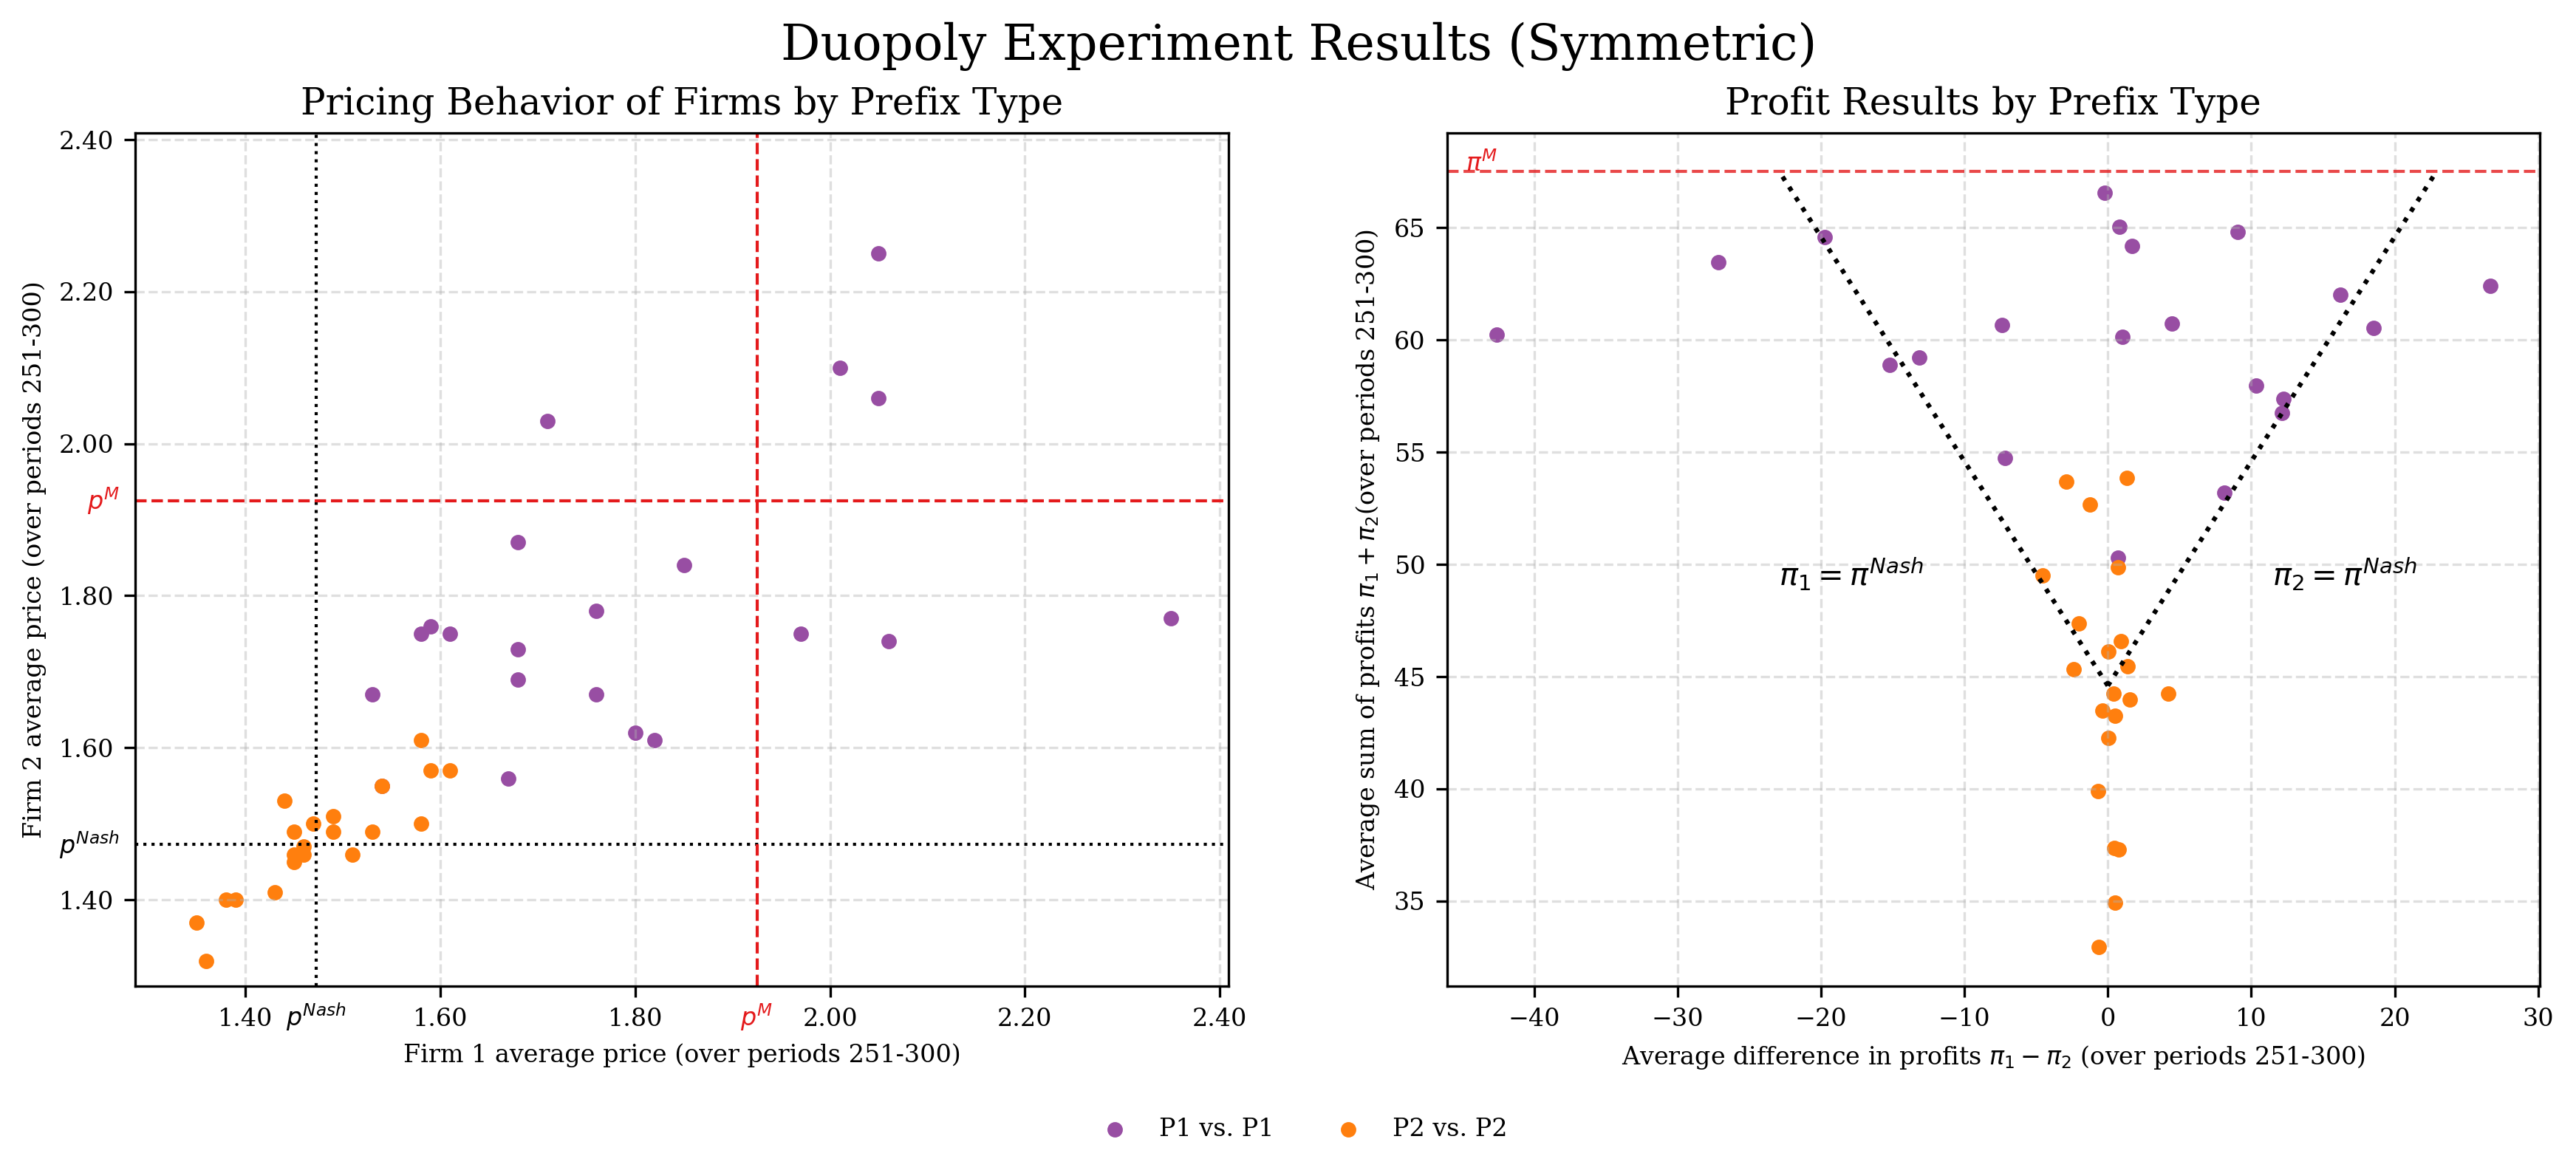

In [34]:
plot_duopoly_results_from_df(
    df=df_sym,
    p_nash=p_nash,
    p_m=p_m,
    pi_nash=pi_nash,
    pi_m=pi_m,
    title="Duopoly Experiment Results (Symmetric)",
    save_path=DUOPOLY_OUPUT_PATH / "duopoly_experiment_symmetric_results",
)

In [54]:
df_sym_2 = (
    df_sym.filter(pl.col("round") > 250)
    .with_columns(
        # nomalize price
        (pl.col("chosen_price") / pl.col("alpha")).alias("price_normalized")
    )
    .pivot(
        index=["experiment_timestamp", "agent_prefix_type", "round"],
        on="agent",
        values=["price_normalized"],
    )
)
df_sym_2

experiment_timestamp,agent_prefix_type,round,Firm A,Firm B
str,str,i64,f64,f64
"""1750982396""","""P1""",251,1.73,1.732
"""1750982396""","""P1""",252,1.72,1.732
"""1750982396""","""P1""",253,1.72,1.732
"""1750982396""","""P1""",254,1.74,1.732
"""1750982396""","""P1""",255,1.71,1.732
…,…,…,…,…
"""1751091046""","""P2""",296,1.614,1.5605
"""1751091046""","""P2""",297,1.614,1.5605
"""1751091046""","""P2""",298,1.6145,1.5605


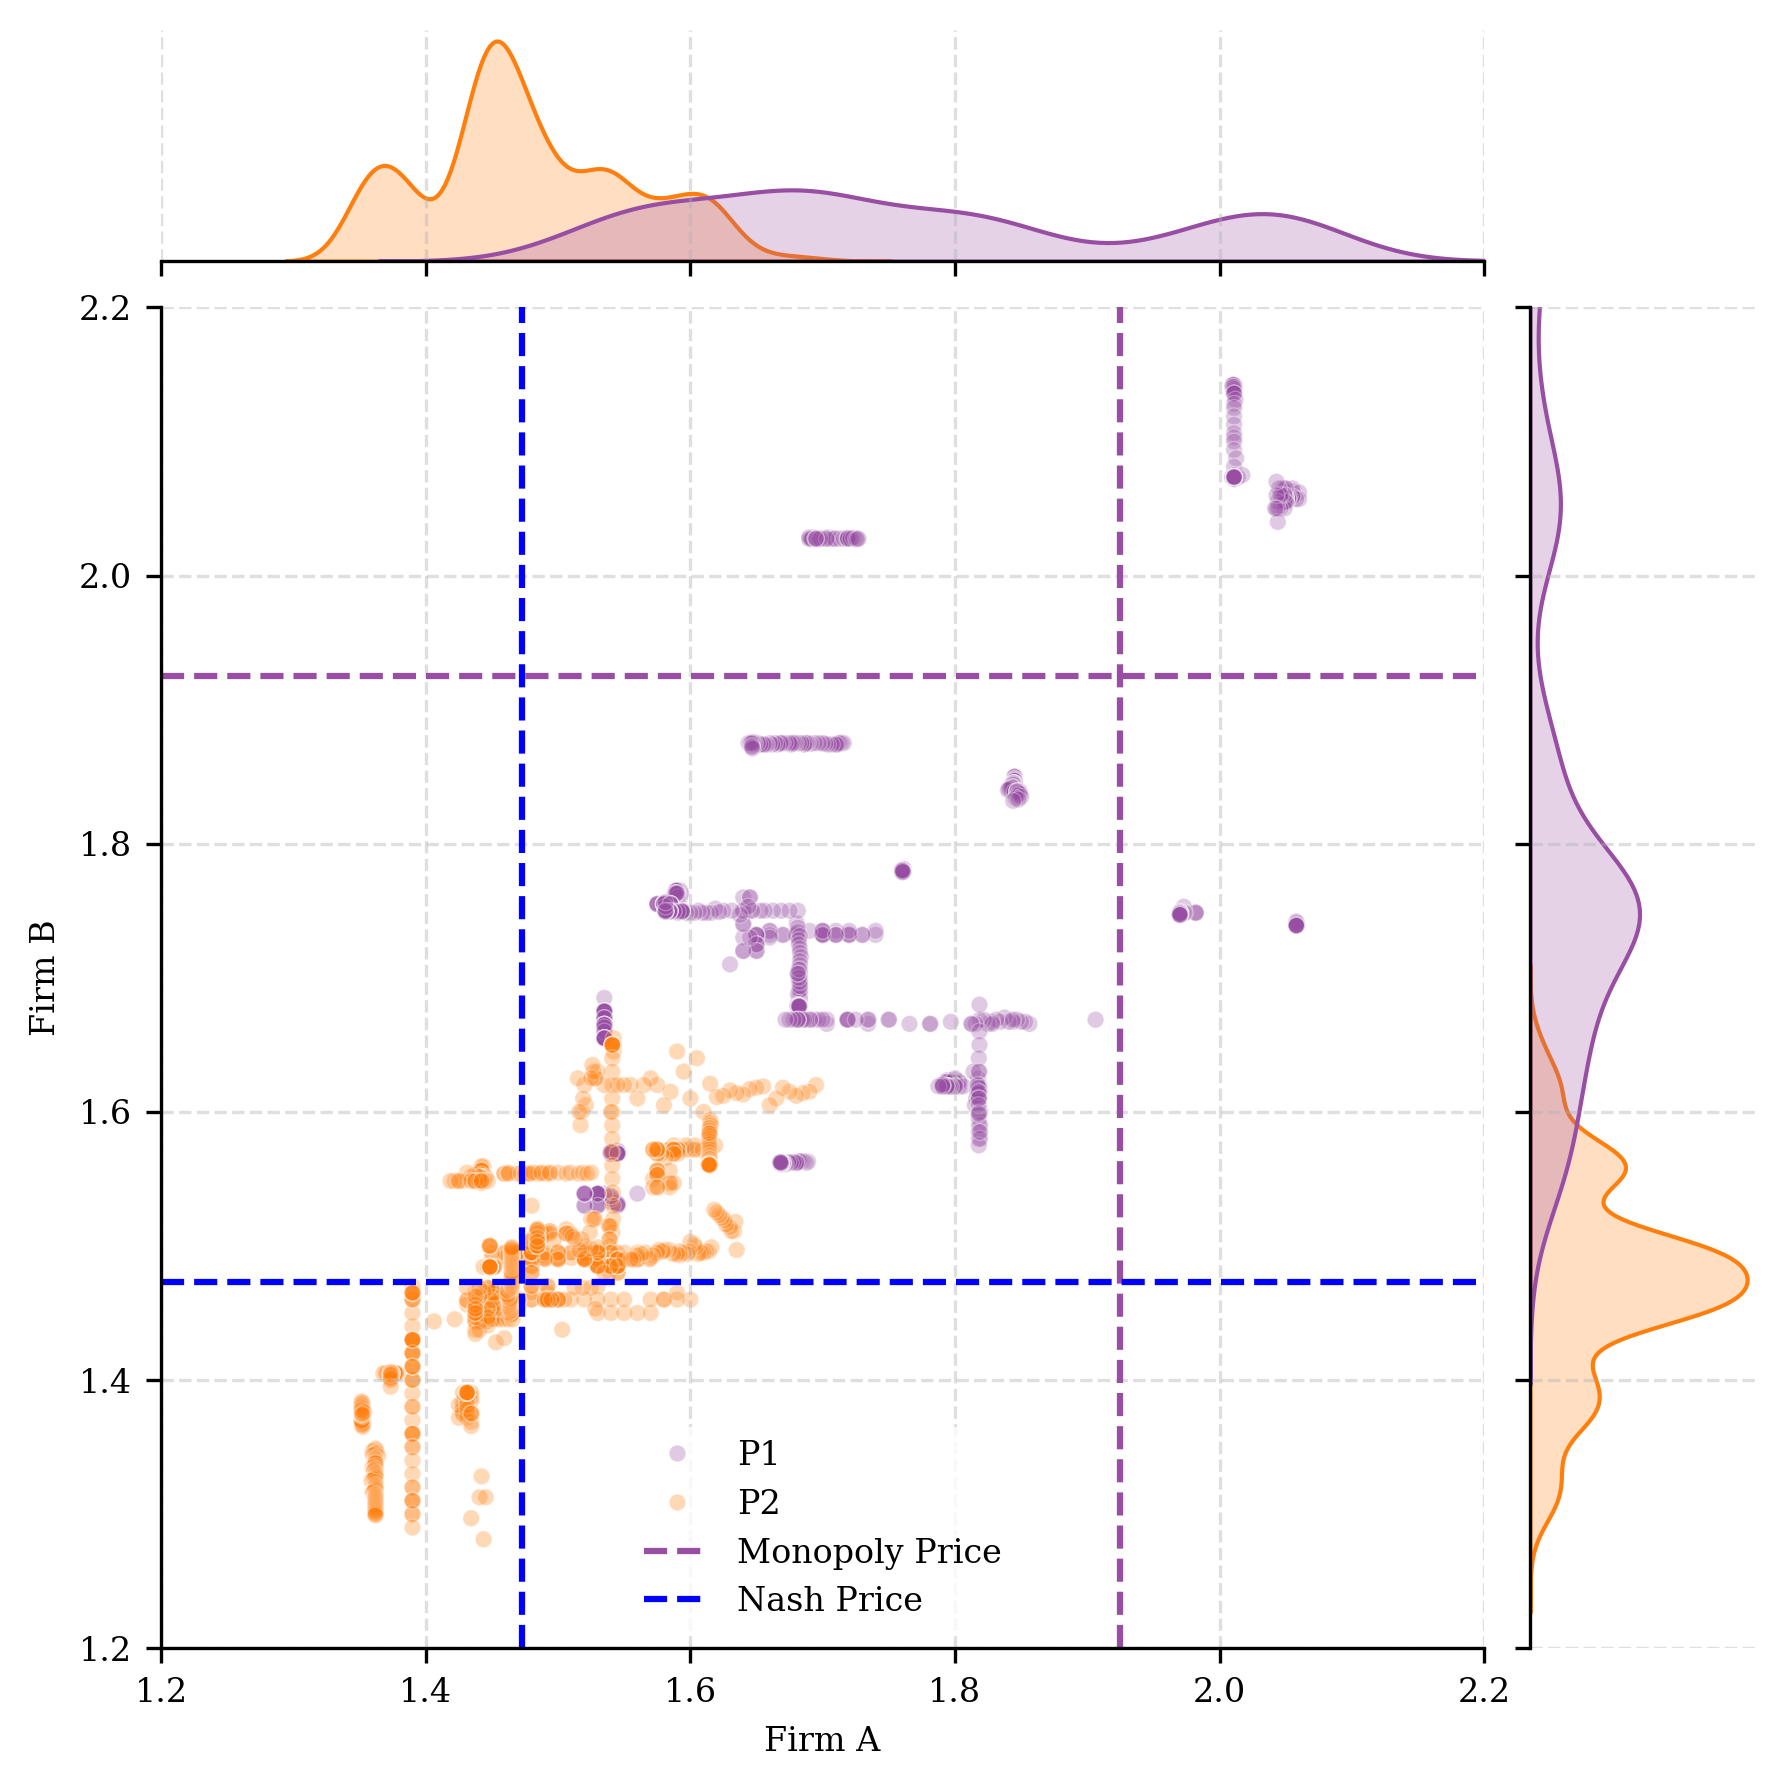

In [57]:
import seaborn as sns

# sns.jointplot(data=df_sym_2, x="Firm A", y="Firm B", kind="hex",
#               )
# limit axis between 1 and 3
sns.jointplot(
    data=df_sym_2,
    x="Firm A",
    y="Firm B",
    hue="agent_prefix_type",
    #   xlim=(1.25, 2.75), ylim=(1.25, 2.75),
    alpha=0.3,
    xlim=(1.2, 2.2),
    ylim=(1.2, 2.2),
)

# add p_m and p_nash lines
import matplotlib.pyplot as plt

plt.axvline(x=p_m, linestyle="--", label="Monopoly Price")
plt.axhline(y=p_m, linestyle="--")
plt.axvline(x=p_nash, color="blue", linestyle="--", label="Nash Price")
plt.axhline(y=p_nash, color="blue", linestyle="--")
plt.legend()

In [ ]:
# HEAT MAP OF ALL PRICES (OR JUST FIRST 100 vs LAST 200)
# JOIN DISTRIBUTIONS OF BOOTH AGENTS, PROMPTS

# Asymmetric case
---

In [6]:
df_asym = df.filter(~df["is_symmetric"])
df_asym.head()

experiment_timestamp,experiment_name,num_agents,agent,round,start_time_exper,end_time_exper,a_0,a,mu,alpha,beta,sigma,c,group_idxs,monopoly_prices,monopoly_quantities,monopoly_profits,nash_prices,nash_quantities,nash_profits,agent_prefix,agent_prefix_type,agent_prompt,agent_memory_length,agent_model,agent_env_env_index,agent_env_a,agent_env_alpha,agent_env_c,observations,plans,insights,chosen_price,marginal_cost,quantity,profit,market_data,is_symmetric,is_synthetic
str,str,i64,str,i64,str,str,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,str,str,str,i64,str,i64,f64,f64,f64,str,str,str,f64,f64,f64,f64,str,bool,bool
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",1,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""The product cost is $1.00, and…","""Implement a basic price testin…","""Since there is no historical d…",4.51,1.0,0.09,0.31,"""- My price: 4.51 - Competitor'…",false,true
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",2,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""The initial price of $4.51 res…","""Continue with the price testin…","""The initial test at $4.51 show…",4.0,1.0,0.67,2.01,"""- My price: 4.0 - Competitor's…",false,true
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",3,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""The price reduction to $4.00 i…","""Continue exploring lower price…","""Lower prices have shown to att…",3.5,1.0,4.73,11.83,"""- My price: 3.5 - Competitor's…",false,true
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",4,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""In Round 3, the price was set …","""Continue testing lower price p…","""Lower prices have shown to att…",3.25,1.0,11.73,26.39,"""- My price: 3.25 - Competitor'…",false,true
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",5,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""The data shows that lowering t…","""Continue testing within the ra…","""Lower prices have consistently…",3.5,1.0,4.53,11.32,"""- My price: 3.5 - Competitor's…",false,true


In [ ]:
self.monopoly_prices = get_monopoly_prices(
    a0=self.a_0,
    a=self.a,
    mu=self.mu,
    alpha=self.alpha,
    c=current_c,
    multiplier=self.beta,
    sigma=self.sigma,
    group_idxs=self.group_idxs,
)

self.monopoly_quantities = get_quantities(
    p=tuple(self.monopoly_prices),
    a0=self.a_0,
    a=self.a,
    mu=self.mu,
    alpha=self.alpha,
    multiplier=self.beta,
    sigma=self.sigma,
    group_idxs=self.group_idxs,
)

self.monopoly_profits = get_profits(
    p=tuple(self.monopoly_prices),
    a0=self.a_0,
    a=self.a,
    mu=self.mu,
    alpha=self.alpha,
    c=current_c,
    multiplier=self.beta,
    sigma=self.sigma,
    group_idxs=self.group_idxs,
)

self.nash_prices = get_nash_prices(
    a0=self.a_0,
    a=self.a,
    mu=self.mu,
    alpha=self.alpha,
    c=current_c,
    multiplier=self.beta,
    sigma=self.sigma,
    group_idxs=self.group_idxs,
)

self.nash_quantities = get_quantities(
    p=tuple(self.nash_prices),
    a0=self.a_0,
    a=self.a,
    mu=self.mu,
    alpha=self.alpha,
    multiplier=self.beta,
    sigma=self.sigma,
    group_idxs=self.group_idxs,
)

self.nash_profits = get_profits(
    p=tuple(self.nash_prices),
    a0=self.a_0,
    a=self.a,
    mu=self.mu,
    alpha=self.alpha,
    c=current_c,
    multiplier=self.beta,
    sigma=self.sigma,
    group_idxs=self.group_idxs,
)

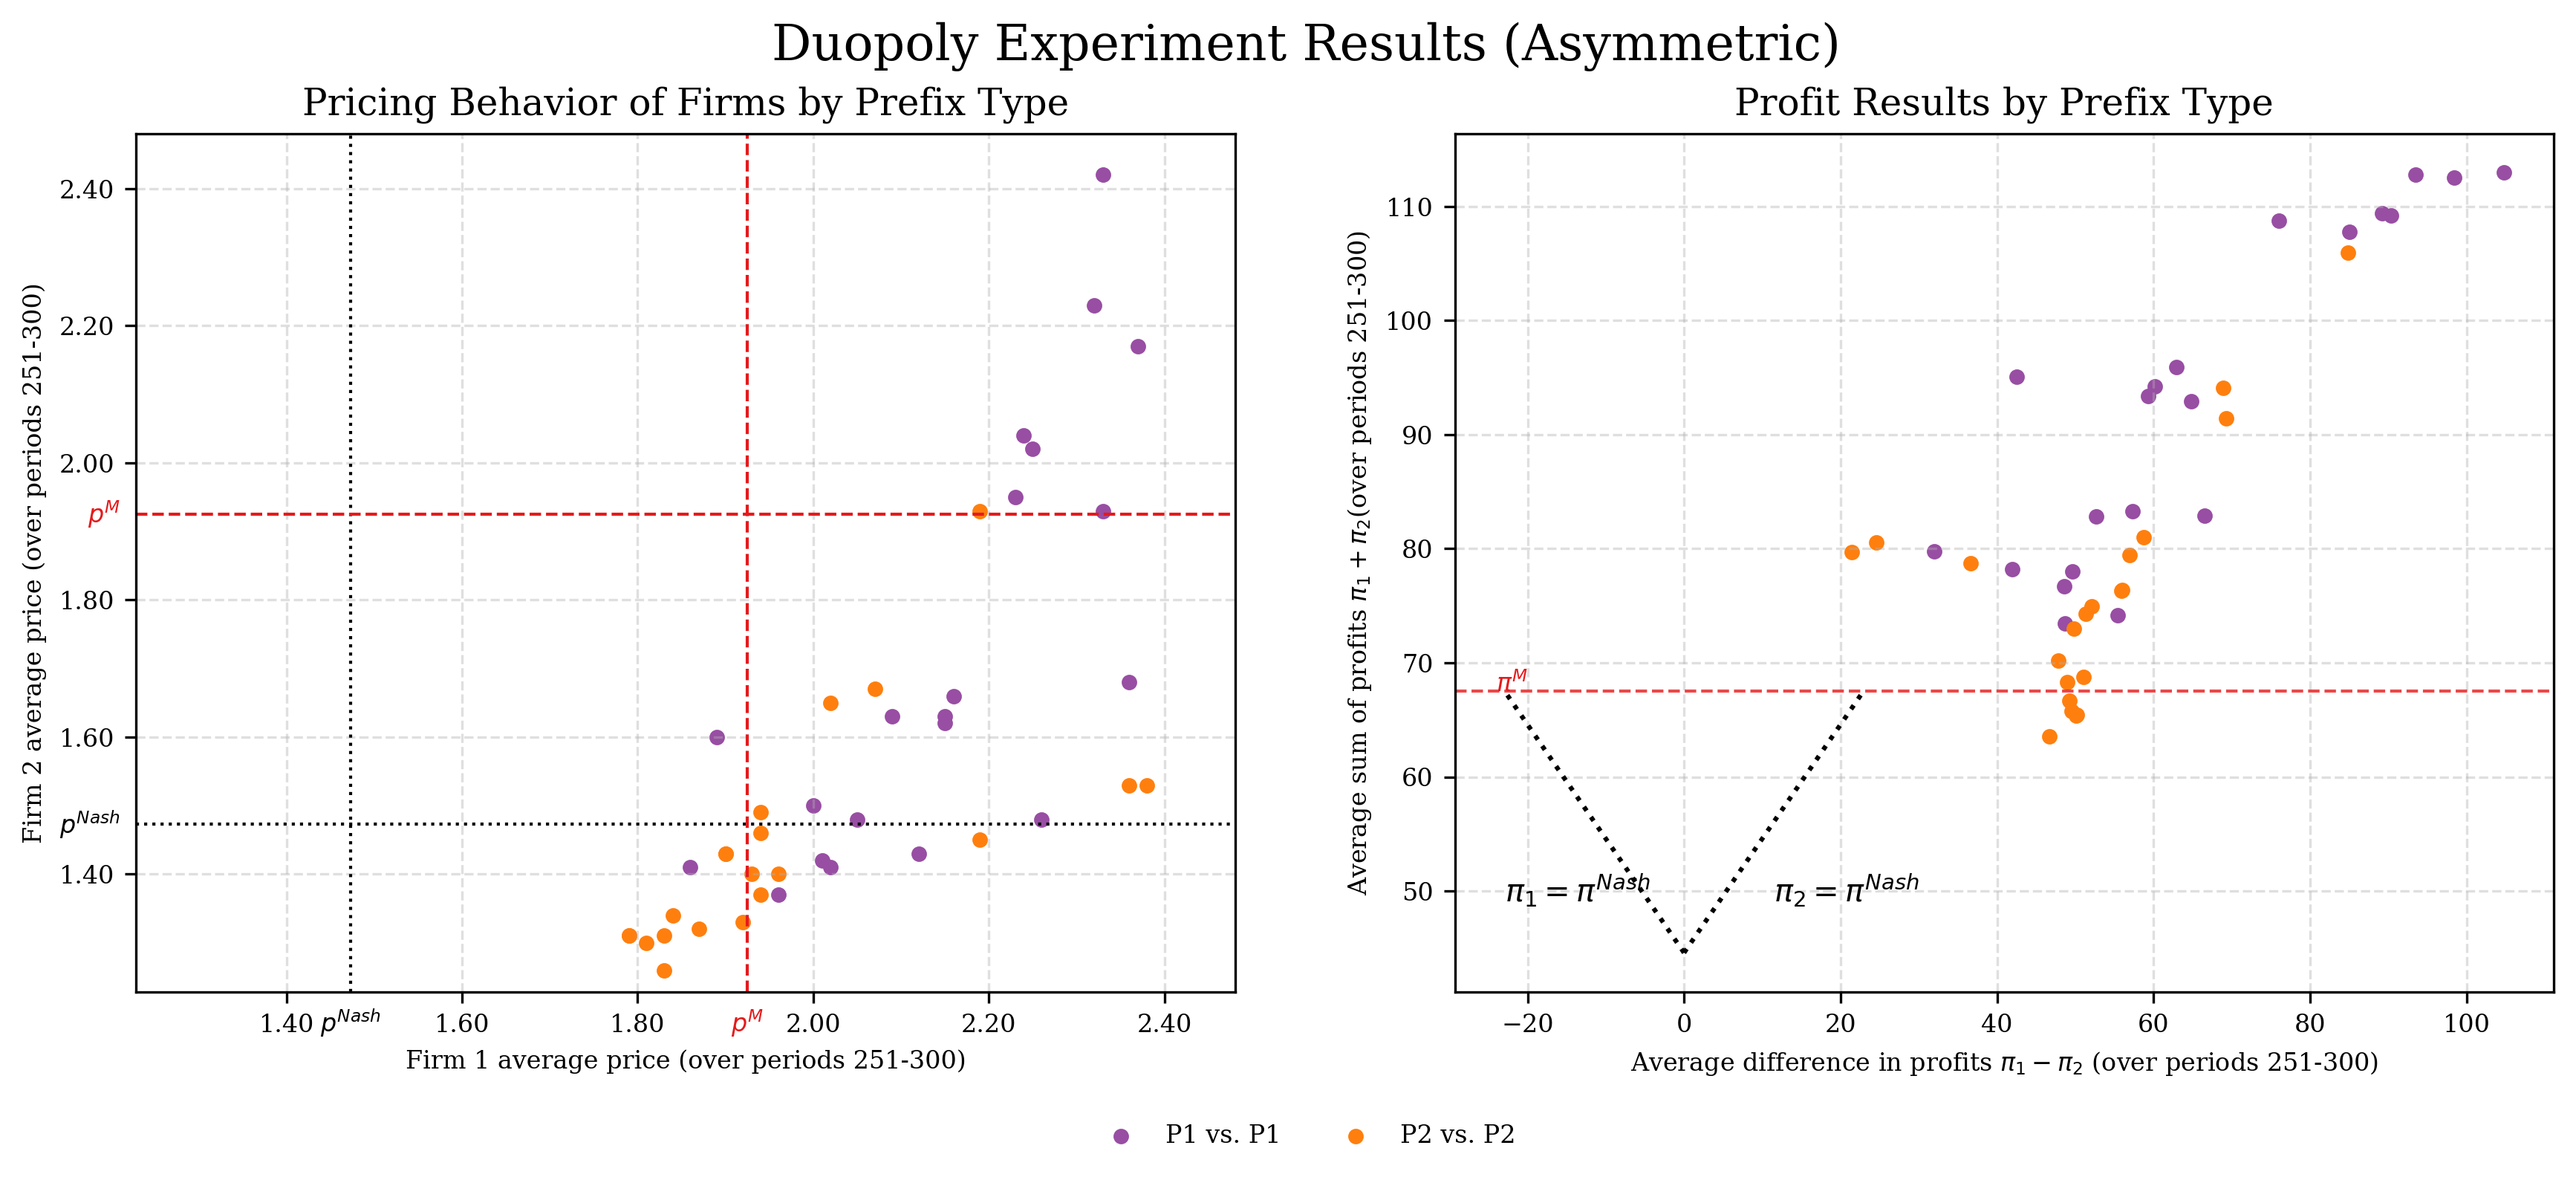

In [7]:
plot_duopoly_results_from_df(
    df=df_asym,
    p_nash=p_nash,
    p_m=p_m,
    pi_nash=pi_nash,
    pi_m=pi_m,
    title="Duopoly Experiment Results (Asymmetric)",
    save_path=DUOPOLY_OUPUT_PATH / "duopoly_experiment_asymmetric_results",
)